In [24]:
__author__ =  'Julia Schmid'

# DAMI01 Data Mining
## Erstellung eines Data Mining Projektes unter der Berücksichtigung des CRISP-DM Ansatzes

In [25]:
# Auskommentieren für die Installation der benötigen Pakete?
#pip install numpy pandas matplotlib math seaborn os
# #X!X 

In [26]:
#BASE_DIR = os.path.dirname(os.path.abspath(""))
#INPUT_CSV_FILE = os.path.join(BASE_DIR, "03_Clustering_Marketing.csv")
#print("Local path to the dataset: %s" % INPUT_CSV_FILE)
#df = pd.read_csv(INPUT_CSV_FILE, sep=',')


### Einstellungen

In [27]:
# Imports
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import StandardScaler

In [28]:
# Alle Spalten eines Datensatzes anzeigen
pd.set_option('display.max_columns', None) 

### Daten einlesen
Datenquelle: Ullah, Z. (2024). Kaggle. Angerufen am 14. Februar 2024 von https:// www.kaggle.com/ datasets/ zabihullah18/ students-
social-network-profile-clustering

In [29]:
df = pd.read_csv("03_Clustering_Marketing.csv", sep=',')

### Daten Verstehen 

In [30]:
# Ausgabe der ersten 5 Zeilen
df.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,2007,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,2007,F,17.41,49,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
2,2007,F,17.511,41,0,0,0,0,0,0,0,1,0,0,0,3,0,0,0,0,0,0,1,2,0,1,0,0,4,0,0,1,0,0,0,0,0,0,1,1
3,2006,F,NaN,36,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2008,F,16.657,1,0,0,0,0,0,1,0,0,3,0,6,0,2,0,0,0,0,0,1,0,1,1,0,0,5,0,0,0,0,3,0,0,0,0,0,0


In [31]:
# Ausgabe der Anzahl der Zeilen und Spalten
print(f'Anzahl Zeilen: {df.shape[0]}')
print(f'Anzahl Spalten: {df.shape[1]}')

Anzahl Zeilen: 15000
Anzahl Spalten: 40


In [32]:
# Ausgabe der Datensatz-Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gradyear         15000 non-null  int64 
 1   gender           13663 non-null  object
 2   age              12504 non-null  object
 3   NumberOffriends  15000 non-null  int64 
 4   basketball       15000 non-null  int64 
 5   football         15000 non-null  int64 
 6   soccer           15000 non-null  int64 
 7   softball         15000 non-null  int64 
 8   volleyball       15000 non-null  int64 
 9   swimming         15000 non-null  int64 
 10  cheerleading     15000 non-null  int64 
 11  baseball         15000 non-null  int64 
 12  tennis           15000 non-null  int64 
 13  sports           15000 non-null  int64 
 14  cute             15000 non-null  int64 
 15  sex              15000 non-null  int64 
 16  sexy             15000 non-null  int64 
 17  hot              15000 non-null

In [33]:
# Ausgabe der Statistischenkennzahlen der numerischen Variablen
df.describe()

,gradyear,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.00000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,2007.496933,29.834533,0.267000,0.255467,0.22200,0.159667,0.142933,0.135000,0.105133,0.104133,0.08820,0.143667,0.328067,0.214600,0.13820,0.126600,0.104733,0.430867,0.301933,0.042133,0.732933,0.245867,0.474933,0.244667,0.112133,0.020800,0.431200,0.116467,0.112867,0.259467,0.357267,0.150267,0.071800,0.051467,0.185867,0.118067,0.091733,0.061067
std,1.116516,35.386649,0.788851,0.702260,0.92042,0.737344,0.638747,0.548691,0.502491,0.519205,0.53032,0.476209,0.810976,1.277806,0.51191,0.470801,0.539305,1.167495,1.075692,0.297261,1.194475,0.742150,1.335873,0.790810,0.585362,0.212533,1.089287,0.461862,2.708619,0.704398,0.728512,0.478716,0.356258,0.280755,0.609928,0.455200,0.420631,0.349112
min,2006.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2006.000000,3.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2008.000000,20.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2008.000000,44.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,2009.000000,605.000000,22.000000,9.000000,22.00000,17.000000,14.000000,31.000000,8.000000,14.000000,15.00000,12.000000,14.000000,114.000000,12.00000,10.000000,26.000000,29.000000,27.000000,9.000000,23.000000,18.000000,52.000000,17.000000,30.000000,11.000000,21.000000,7.000000,327.000000,12.000000,11.000000,8.000000,8.000000,8.000000,16.000000,14.000000,8.000000,16.000000


In [34]:
# Bestimmung der Numerische Variablen 
numerical_var = [col for col in df if df[col].dtype != 'object']
print(numerical_var)

# Bestimmung der Kategorische Variablen
categorical_var = [col for col in df if df[col].dtype == 'object']
print(categorical_var)

['gradyear', 'NumberOffriends', 'basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports', 'cute', 'sex', 'sexy', 'hot', 'kissed', 'dance', 'band', 'marching', 'music', 'rock', 'god', 'church', 'jesus', 'bible', 'hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie', 'die', 'death', 'drunk', 'drugs']
['gender', 'age']


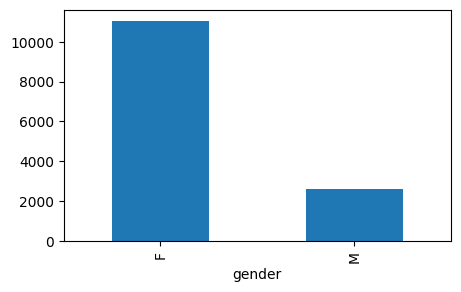

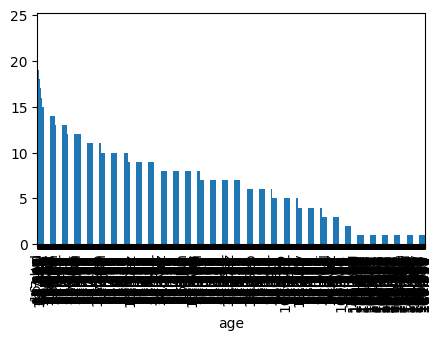

In [35]:
# Kategorische Variablen plotten 
for i in categorical_var:
    plt.figure(figsize=(5, 3)) 
    df[i].value_counts().plot(kind='bar')
    plt.show()

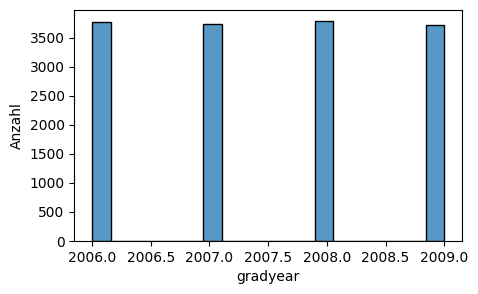

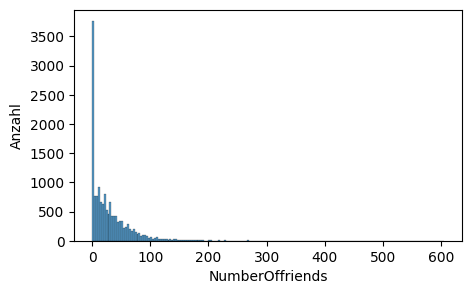

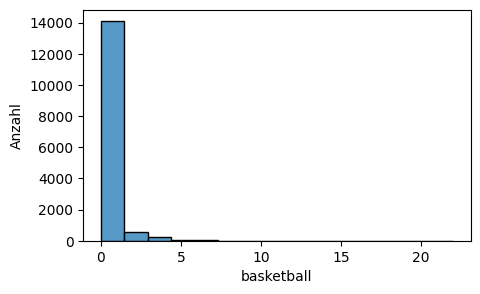

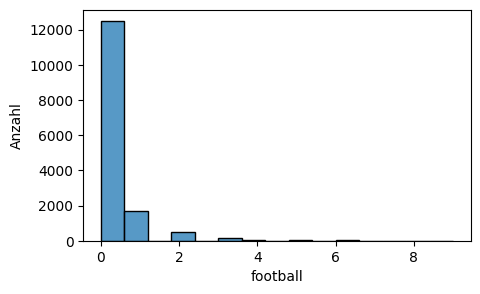

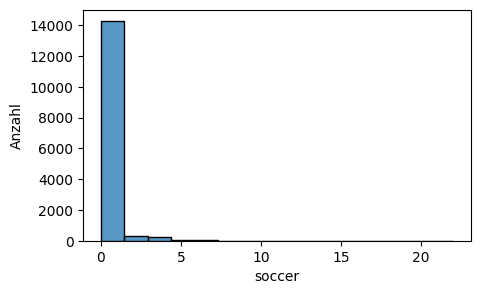

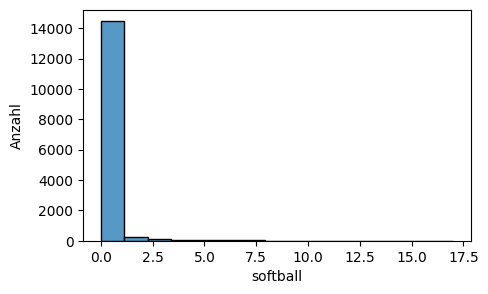

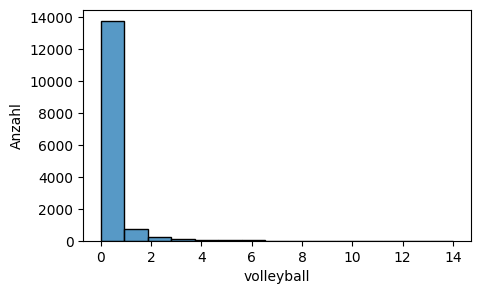

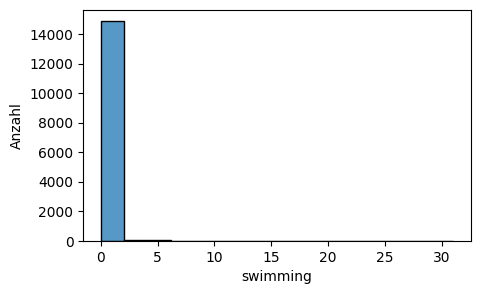

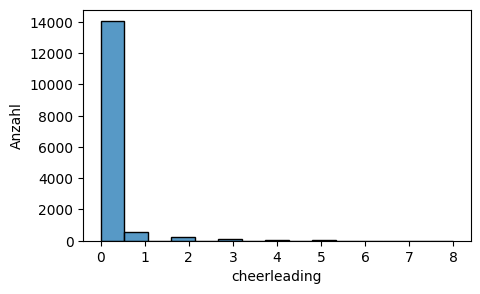

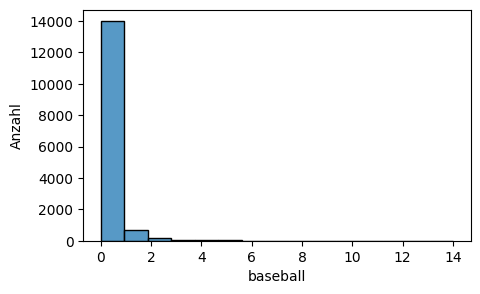

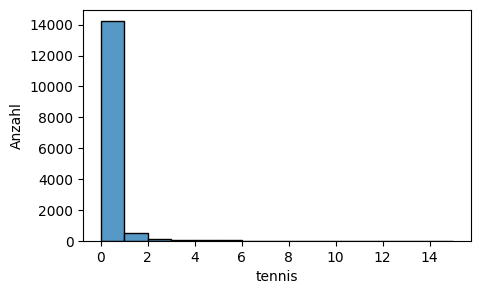

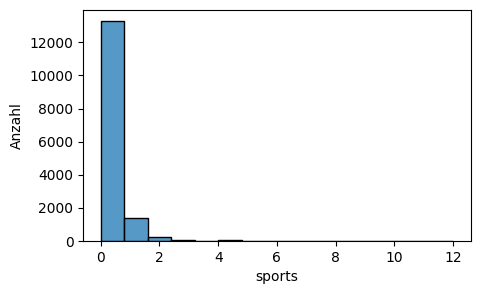

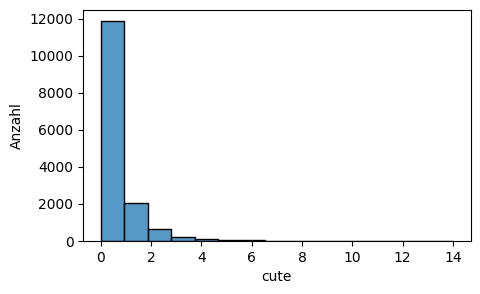

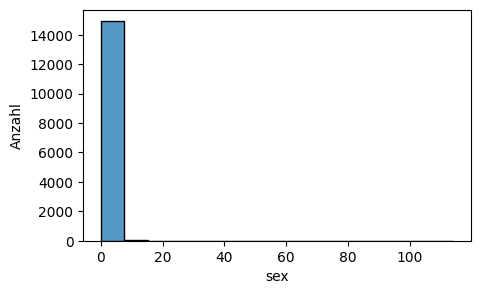

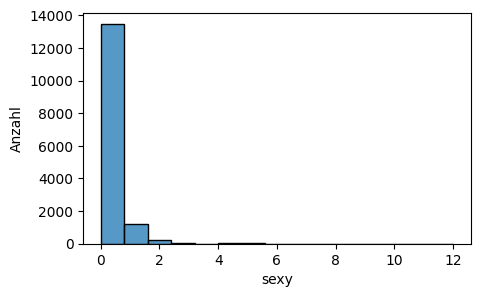

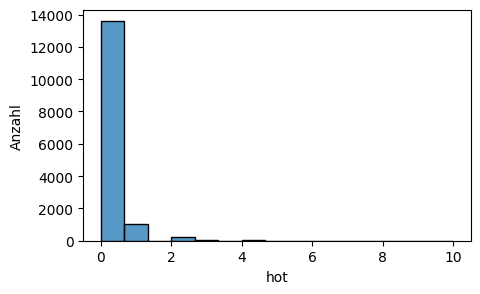

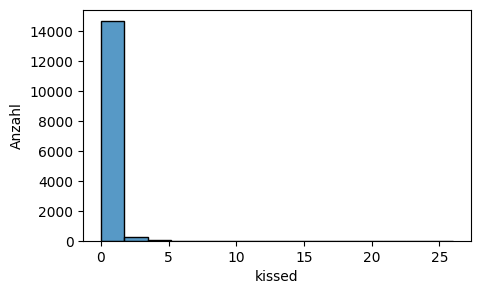

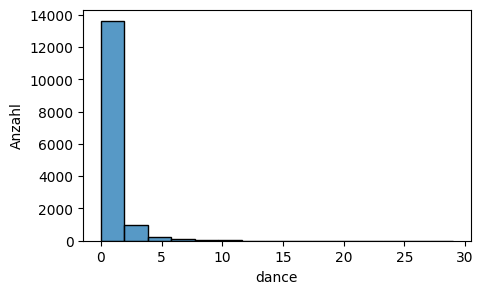

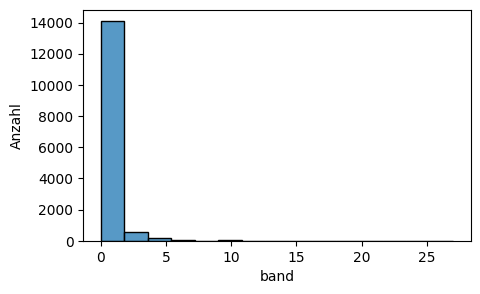

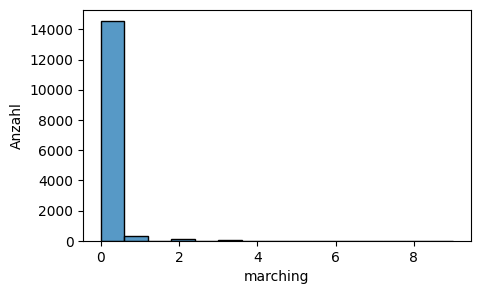

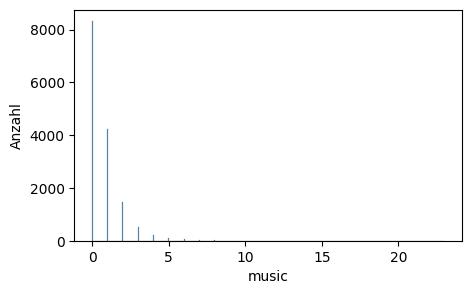

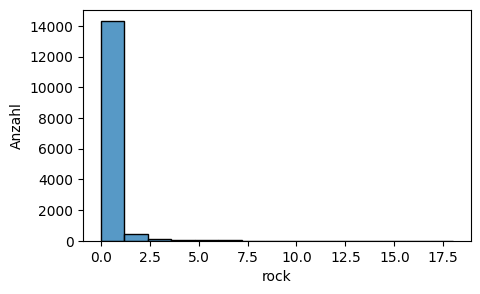

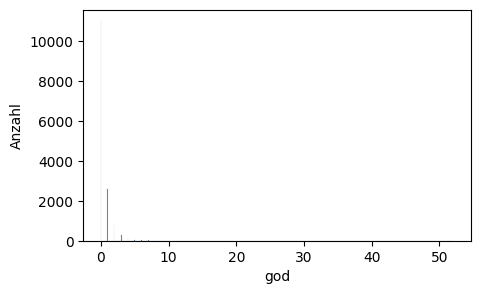

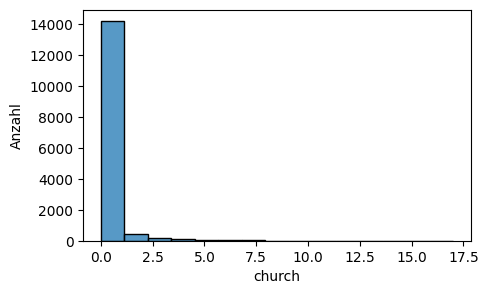

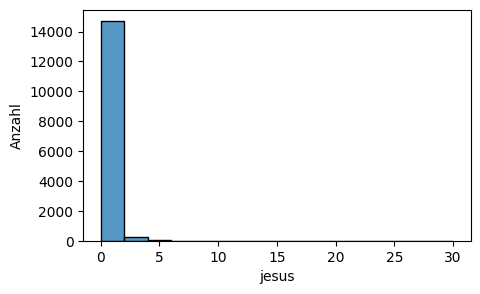

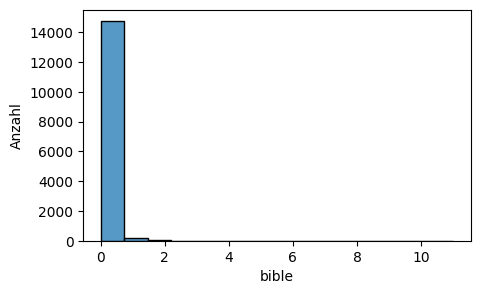

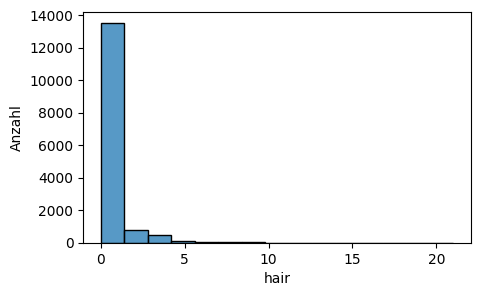

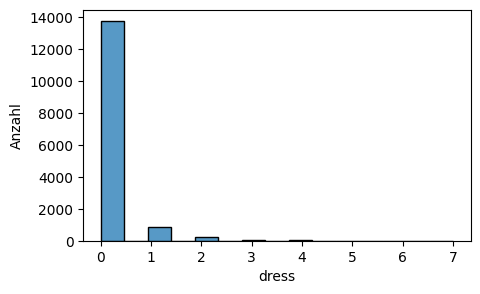

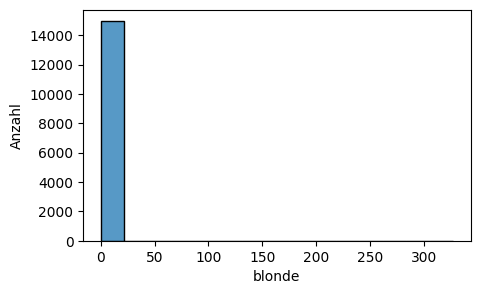

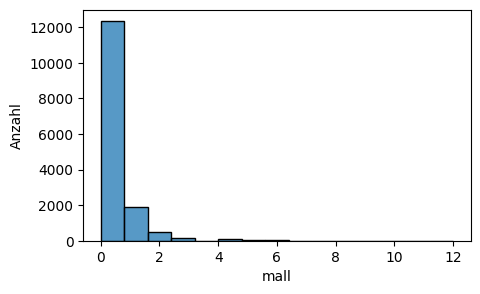

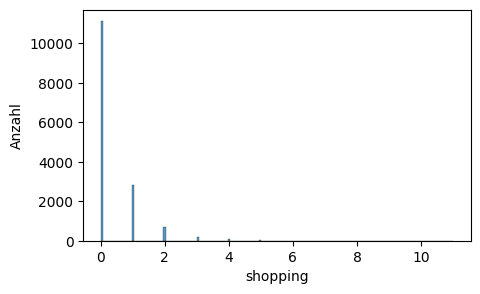

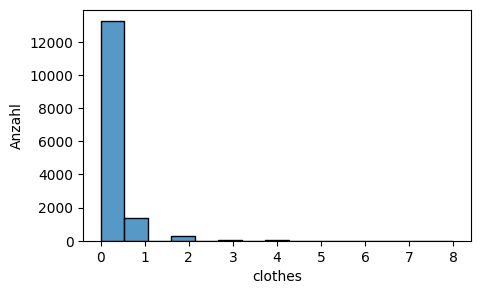

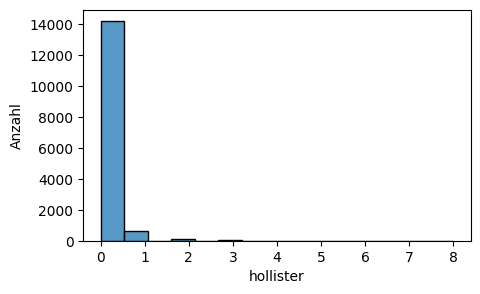

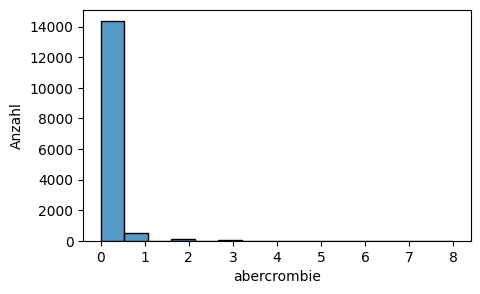

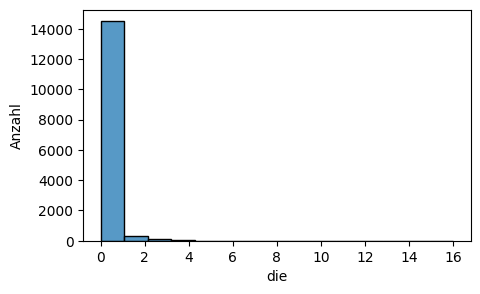

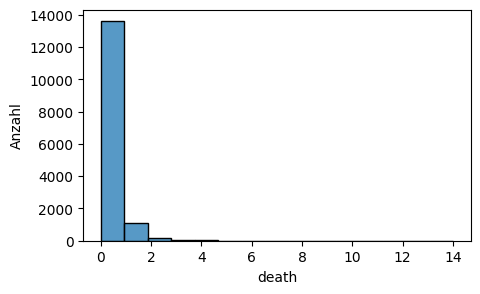

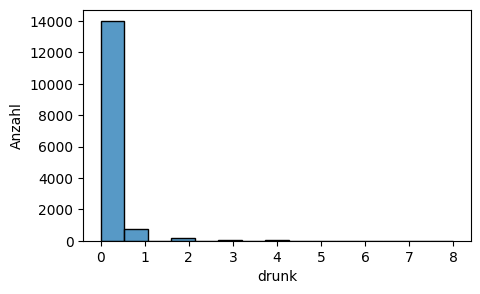

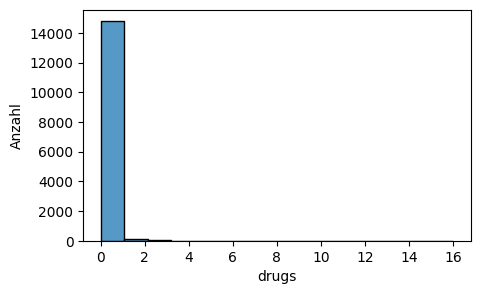

In [36]:
# Numerische Variablen plotten 
for i in numerical_var:
    plt.figure(figsize=(5, 3))
    sns.histplot(data=df, x=i)  
    plt.xlabel(i)  
    plt.ylabel('Anzahl')        
    plt.show()

### Daten aufbereiten

**NaN-Werte**

In [37]:
# Ausgabe des Namens der Variablen mit NaN-Werte und die Anzahl der Einträge mit NaN-Werten
count_nan = df.isna().sum()
count_nan[count_nan > 0]

gender    1337
age       2496
dtype: int64

In [38]:
# Fehlende Werte beim der Variable gender werden durch "U" (Unknonw) gefüllt
print(df['gender'].unique())
df['gender']= df['gender'].fillna('U')

[nan 'F' 'M']


In [39]:
# Fehlende Werte bei der Variable age werden mit dem Durchschnittsalter vom dazugehörigen Abschlussjahr gefüllt
print(df['age'].unique())

df['age'] = pd.to_numeric(df['age'], errors='coerce')
df['age'] = df['age'].apply(lambda x: math.floor(x) if pd.notna(x) else x)
df['age'] = df.groupby('gradyear')['age'].transform(lambda x: x.fillna(x.mean()))
df['age'] = df['age'].astype(int)

df['age'].describe()

[nan '17.41' '17.511' ... '8.498' '19.975' '106.511']


count    15000.000000
mean        17.388333
std          6.972276
min          4.000000
25%         16.000000
50%         17.000000
75%         18.000000
max        106.000000
Name: age, dtype: float64

**Duplikate**

In [40]:
df.duplicated().sum()

831

In [41]:
df = df.drop_duplicates()

**Bearbeitung der Ausreißer**

In [42]:
# Alter ändern: Ausreißer werden mit der IQR-Methode bearbeitet
q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr = q3-q1
df = df[(df['age'] > (q1 - 1.5*iqr)) & (df['age'] < (q3 + 1.5*iqr))]
df['age'].describe()

count    13989.000000
mean        16.790264
std          1.127700
min         14.000000
25%         16.000000
50%         17.000000
75%         18.000000
max         20.000000
Name: age, dtype: float64

**Datentransformation**

In [43]:
# 'gender' in einen numerischen Datentyp ändern
# Female (F) = 1, Male (M) = 2, Unknonwn (U) = 2
df['gender'] = df['gender'].replace({'F': 1, 'M': 2, 'U': 3}).astype(int)

/var/folders/jf/k1y_jzxs5177jm_fgv__dnww0000gn/T/ipykernel_45727/2793148955.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['gender'] = df['gender'].replace({'F': 1, 'M': 2, 'U': 3}).astype(int)


In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 13989 entries, 0 to 14999
Data columns (total 40 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   gradyear         13989 non-null  int64
 1   gender           13989 non-null  int64
 2   age              13989 non-null  int64
 3   NumberOffriends  13989 non-null  int64
 4   basketball       13989 non-null  int64
 5   football         13989 non-null  int64
 6   soccer           13989 non-null  int64
 7   softball         13989 non-null  int64
 8   volleyball       13989 non-null  int64
 9   swimming         13989 non-null  int64
 10  cheerleading     13989 non-null  int64
 11  baseball         13989 non-null  int64
 12  tennis           13989 non-null  int64
 13  sports           13989 non-null  int64
 14  cute             13989 non-null  int64
 15  sex              13989 non-null  int64
 16  sexy             13989 non-null  int64
 17  hot              13989 non-null  int64
 18  kissed     

In [45]:
# Speicherung der Namen der Variablen mit der Häufigekits 
mentions = df.columns[4:].tolist()

**Skalierung**

In [46]:
df_scaled = df.copy()

scaler = MinMaxScaler(feature_range=(0, 1))
df_scaled[df.columns] = scaler.fit_transform(df)


In [47]:
df_scaled.head()

,gradyear,gender,age,NumberOffriends,basketball,football,soccer,softball,volleyball,swimming,cheerleading,baseball,tennis,sports,cute,sex,sexy,hot,kissed,dance,band,marching,music,rock,god,church,jesus,bible,hair,dress,blonde,mall,shopping,clothes,hollister,abercrombie,die,death,drunk,drugs
0,0.333333,1.0,0.500000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0000
1,0.333333,0.0,0.500000,0.080992,0.0,0.0,0.045455,0.0,0.0,0.032258,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.019231,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.125,0.0000
2,0.333333,0.0,0.500000,0.067769,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.071429,0.0,0.0,0.000000,0.026316,0.000000,0.0,0.0,0.0,0.0,0.0,0.043478,0.111111,0.000000,0.090909,0.0,0.0,0.190476,0.0,0.0,0.083333,0.0,0.000,0.0,0.0,0.0,0.0,0.125,0.0625
3,0.000000,0.0,0.666667,0.059504,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0,0.000,0.0,0.0,0.0,0.0,0.000,0.0000
4,0.666667,0.0,0.333333,0.001653,0.0,0.0,0.000000,0.0,0.0,0.032258,0.0,0.000000,0.2,0.0,0.428571,0.000000,0.166667,0.0,0.0,0.0,0.0,0.0,0.043478,0.000000,0.019231,0.090909,0.0,0.0,0.238095,0.0,0.0,0.000000,0.0,0.375,0.0,0.0,0.0,0.0,0.000,0.0000


In [48]:
df_scaled.shape

(13989, 40)

### Modellierung

**Bestimmung der Clusteranzahl**

1. Ellbogenmethode

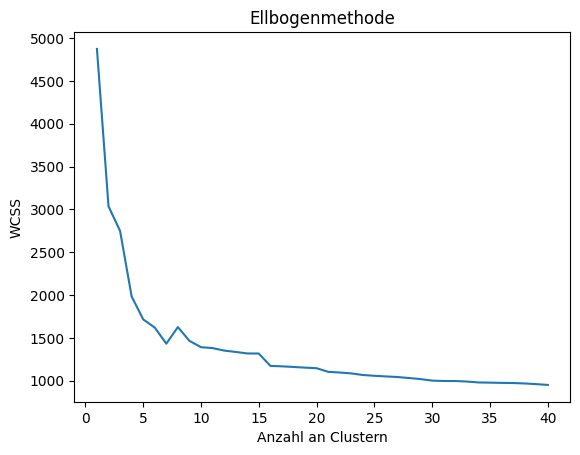

In [49]:
wcss = []

for i in range(1, 41):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    wcss.append(kmeans.inertia_)
    
# Plot der WCSS für verschiedene Clusteranzahlen
plt.plot(range(1, 41), wcss)
plt.title('Ellbogenmethode')
plt.xlabel('Anzahl an Clustern')
plt.ylabel('WCSS')
plt.show()


In [50]:
print(f"Die optimale Clusteranzahl ist {6}.")

Die optimale Clusteranzahl ist 6.


2. Silhoutten-Score

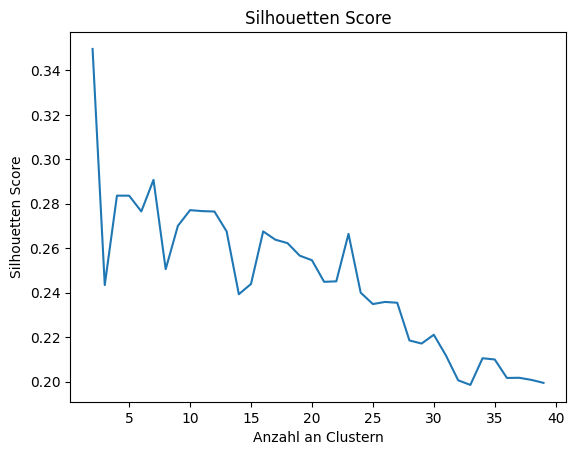

Die optimale Clusteranzahlr ist 6.


In [51]:
silScores = []

for i in range(2, 40):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(df_scaled)
    labels = kmeans.labels_
    score = silhouette_score(df_scaled, labels)
    silScores.append(score)

# Plot der Silhouetten Score für verschiedene Clusteranzahlen
plt.plot(range(2, 40), silScores)
plt.title('Silhouetten Score')
plt.xlabel('Anzahl an Clustern')
plt.ylabel('Silhouetten Score')
plt.show()

# Bestimmung der optiomalen Clusteranzahl (Maximaler Silhouetten Score)
silScores_neu = silScores[1:]
best_n_clusters = silScores[1:].index(max(silScores[1:])) + 2 
print(f"Die optimale Clusteranzahlr ist {best_n_clusters}.")

**Modelle**

1. K-Means

In [52]:
from sklearn.metrics import davies_bouldin_score


In [53]:
def KMeans_Modell(numbCluster, randomState, dfScaled, dfUnscaled, nameVar):
    kmeans = KMeans(n_clusters = numbCluster,  random_state = randomState)
    kmeans = kmeans.fit(dfScaled)
    y_pred = kmeans.predict(dfScaled)
    dfUnscaled[nameVar] = kmeans.labels_
    temp = kmeans.labels_
    db_index = davies_bouldin_score(dfScaled, temp)
    print(f'Davies-Bouldin-Index: {db_index}')
    return dfUnscaled


In [54]:
df =  KMeans_Modell(6, 42, df_scaled, df, 'cluster_kmeans')

Davies-Bouldin-Index: 1.170877251990509


2. Hierarchisches Clustering 

In [72]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from sklearn.preprocessing import StandardScaler

def hierarchy_Modell(numbCluster, nameVar, dfScaled, dfUnscaled):
    hierarch = linkage(dfScaled, method='complete')
    hierarch_label = fcluster(hierarch, numbCluster, criterion='maxclust')
    dfUnscaled[nameVar] = hierarch_label
    db_index = davies_bouldin_score(dfScaled, hierarch_label)
    print(f'Davies-Bouldin-Index: {db_index}')
    return dfUnscaled

In [73]:
df = hierarchy_Modell(6, 'cluster_hierarch', df_scaled, df)

Davies-Bouldin-Index: 1.4920935003972613


3. DBSCAN

Bestimmung der optimalen Parameter eps und MinPts

In [57]:
# MinPts≥D+1 oder MinPts=2×D
# eps = ellbogen Methode (am stärksten zunimmt) --> k = MinPts−1

In [58]:
# Dimension des Datensatzes
d = df_scaled.shape[1]
print(f"Die Dimension des Datensatz ist {d}.")

Die Dimension des Datensatz ist 40.


In [59]:
minPts_var = d*2 #d+1
minPts_var

80

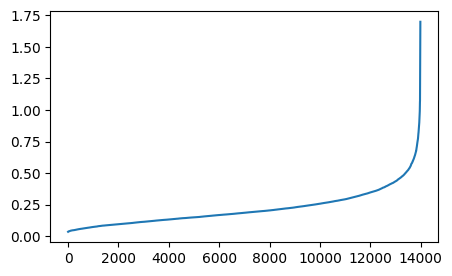

In [60]:
from sklearn.neighbors import NearestNeighbors

k = 41 - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)

distances = distances[:,k-1] # Letzte Distanz betrachten
plt.figure(figsize = (5,3))
plt.plot(distances)
plt.show()

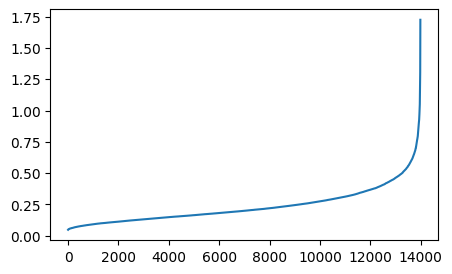

In [61]:
from sklearn.neighbors import NearestNeighbors

k =  2*d - 1
neighbors = NearestNeighbors(n_neighbors=k)
neighbors_fit = neighbors.fit(df_scaled)
distances, indices = neighbors_fit.kneighbors(df_scaled)
distances = np.sort(distances, axis=0)

distances = distances[:,k-1] # Letzte Distanz betrachten
plt.figure(figsize = (5,3))
plt.plot(distances)
plt.show()

In [74]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.45, min_samples=(2*d))
dbscan.fit(df_scaled)

df['cluster_dbscans'] = dbscan.labels_
df['cluster_dbscans'].value_counts()

temp = dbscan.labels_
db_index = davies_bouldin_score(df_scaled, temp)
print(f'Davies-Bouldin-Index: {db_index}')

Davies-Bouldin-Index: 3.1457258502156638


## Evaluierung

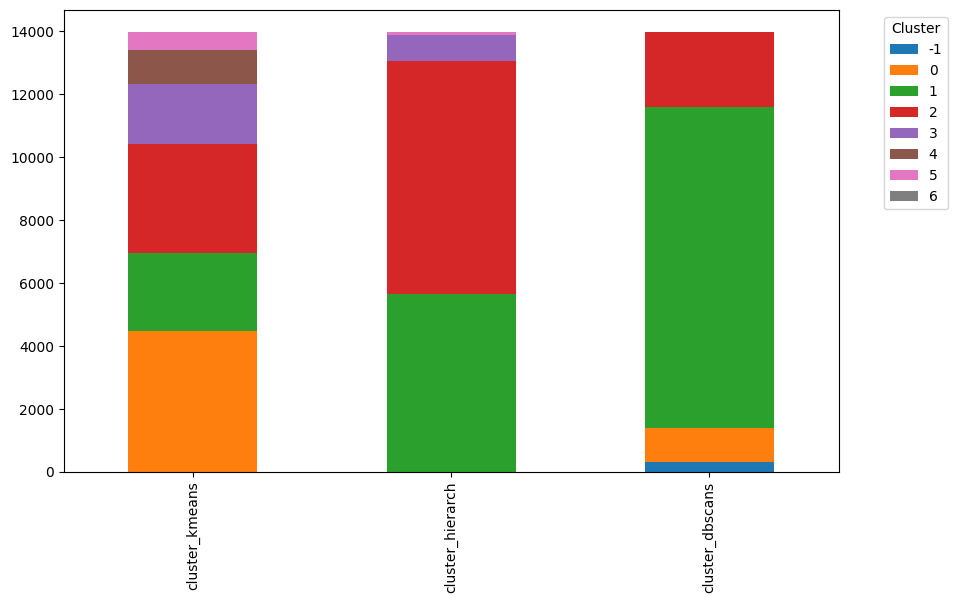

In [75]:
columnsCluster = ['cluster_kmeans', 'cluster_hierarch', 'cluster_dbscans']

value_counts_dict = {column: df[column].value_counts() for column in columnsCluster}

df_result = pd.DataFrame(value_counts_dict).fillna(0).astype(int)
df_result.columns = [f'{col}' for col in df_result.columns]
df_result.reset_index(inplace=True)
df_result.rename(columns={'index': 'Cluster'}, inplace=True)
df_result = df_result.sort_values(by='Cluster').reset_index(drop=True)
df_result = df_result.set_index('Cluster').T

df_result.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1.05, 1))

In [76]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.gridspec import GridSpec

# Funktion: Bestimmung der Top 10 Themen pro Cluster
def top10Mention(df, clusterVar):
    cluster_analysis = df.groupby(clusterVar).sum().T
    df_temp = pd.DataFrame(cluster_analysis)
    df_temp = df_temp.reset_index()
    df_temp = df_temp[df_temp['index'].isin(mentions)]
    top10MentionDic = {}
    for i in df_temp.columns[1:].tolist():
        top_10 = df_temp[['index', i]].sort_values(by=i, ascending=False).head(10)
        top10MentionDic[i] = top_10['index'].tolist()

    return top10MentionDic


# Funktion: Ausgabe der Top 10 Themen pro Cluster
def printTop10Mentions(top10Mentions):
    for key, values in top10Mentions.items():
        print(f"Cluster {key}: " + ', '.join(values))


# Funktion: Alter pro Cluster 
def plotAgePerCluster(ax, df, clusterName):
    df_temp = df.groupby(["age", clusterName]).size().unstack(fill_value=0)
    df_temp.plot(kind="bar", stacked=True, ax=ax)

    ax.set_title("Altersverteilung pro Cluster")
    ax.set_xlabel("Alter")
    ax.set_ylabel("Anzahl")
    ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1.05, 1))


# Funktion: Alter pro Cluster 
def plotGenderPerCluster(ax, df, clusterName):
    df_temp = df.groupby(["gender", clusterName]).size().unstack(fill_value=0)
    df_temp.plot(kind="bar", stacked=True, ax=ax)

    ax.set_title("Geschlechtsverteilung pro Cluster")
    ax.set_xlabel("Alter")
    ax.set_ylabel("Anzahl")
    ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1.05, 1))

# Funktion: Wortnennungen pro Cluster 
def plotWordMentionsperCluster(ax, df, clusterName, mentions_var):
    df_temp = pd.melt(df, id_vars=[clusterName], value_vars=mentions_var, var_name='Mentions', value_name='Anzahl')
    df_temp = df_temp.pivot_table(index='Mentions', columns=clusterName, values='Anzahl', fill_value=0)
    df_temp.plot(kind='bar', stacked=True, ax=ax)

    ax.set_title("Wortnennungen pro Cluster")
    ax.set_xlabel("")
    ax.set_ylabel("Anzahl")
    ax.legend(title="Cluster", loc='upper left', bbox_to_anchor=(1.05, 1))

# Funktion: Plot Ausgabe
def plotClusterAnalysis(df, clusterName, mentions_var):
    fig = plt.figure(figsize=(10, 6))
    gs = GridSpec(2, 2, figure=fig)
    
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])
    ax3 = fig.add_subplot(gs[1, :])  

    plotAgePerCluster(ax1, df, clusterName)
    plotGenderPerCluster(ax2, df, clusterName)
    plotWordMentionsperCluster(ax3, df, clusterName, mentions_var)
    plt.tight_layout()
    plt.show()

    print('\n\033[1mTop 10 Themen\033[0m')
    top10 = top10Mention(df, clusterName)
    printTop10Mentions(top10)


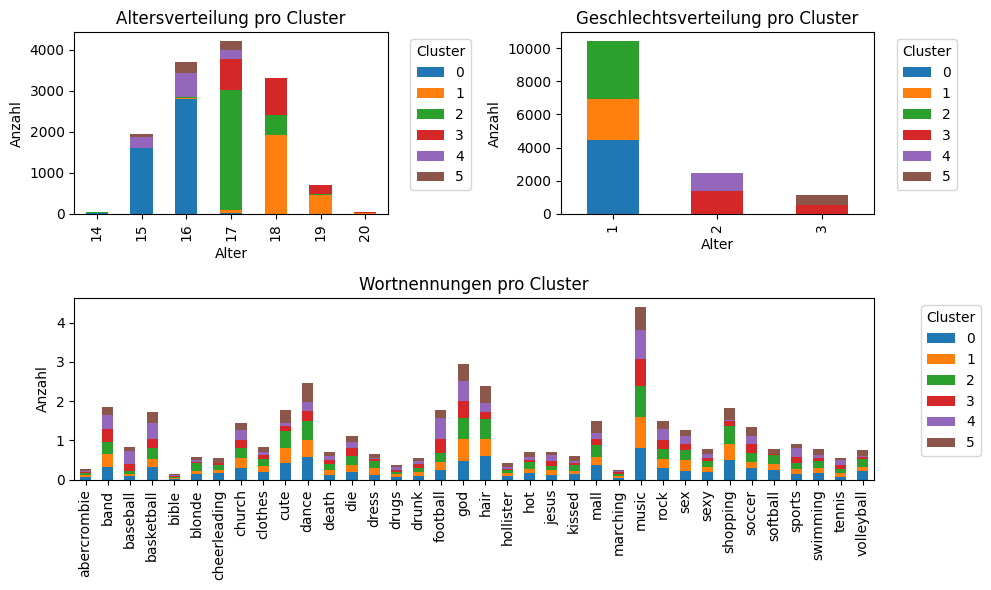


Top 10 Themen
Cluster 0: music, hair, dance, shopping, god, cute, mall, band, basketball, rock
Cluster 1: music, god, hair, shopping, dance, cute, band, sex, church, rock
Cluster 2: music, god, hair, dance, shopping, cute, band, mall, basketball, church
Cluster 3: music, god, band, football, dance, basketball, rock, soccer, die, church
Cluster 4: music, football, god, basketball, band, baseball, rock, church, sports, soccer
Cluster 5: music, dance, hair, god, cute, shopping, mall, basketball, football, soccer


In [77]:
plotClusterAnalysis(df, "cluster_kmeans", mentions)

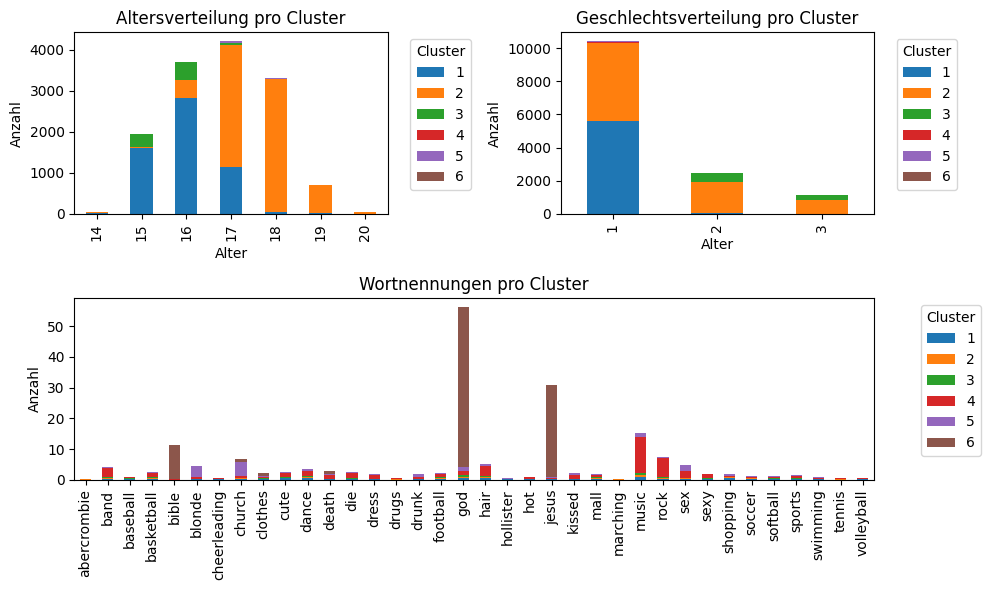


Top 10 Themen
Cluster 1: music, hair, dance, shopping, god, cute, mall, band, basketball, soccer
Cluster 2: music, god, dance, hair, shopping, band, cute, football, basketball, mall
Cluster 3: music, god, basketball, dance, football, mall, hair, baseball, rock, band
Cluster 4: music, rock, hair, band, sex, die, dance, god, sexy, death
Cluster 5: church, blonde, sex, god, drunk, music, shopping, hair, dance, jesus
Cluster 6: god, jesus, bible, death, church, clothes, basketball, blonde, hair, dress


In [78]:
plotClusterAnalysis(df, "cluster_hierarch", mentions)

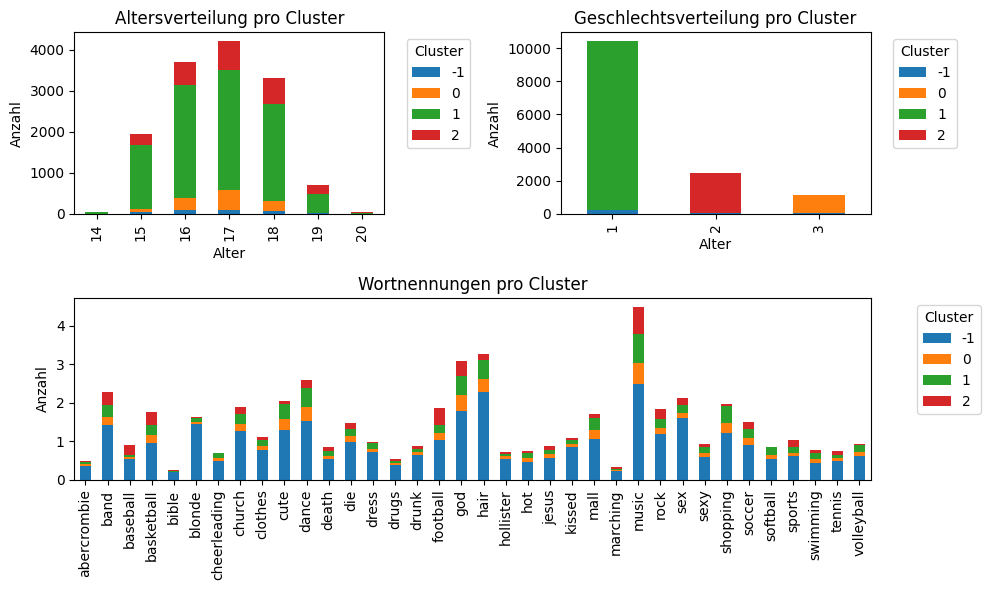


Top 10 Themen
Cluster -1: music, hair, god, sex, dance, blonde, band, cute, church, shopping
Cluster 0: music, god, dance, hair, cute, shopping, mall, band, basketball, church
Cluster 1: music, god, dance, hair, shopping, cute, band, mall, basketball, church
Cluster 2: music, football, god, band, basketball, rock, baseball, dance, sports, soccer


In [67]:
plotClusterAnalysis(df, "cluster_dbscans", mentions)

In [68]:
def valueCounts(df, var):
    print(df[var].value_counts())
    
def evaluateModell(df, var, modelName):
    valueCounts(df, var)
    personenBezogendeErgebnisse(df, modelName)

def durchschnittsAlterProCluster(df, clusterVar):
    mean_age = df.groupby(clusterVar)['age'].mean()
    for cluster, age in mean_age.items():
        print(f"Cluster {cluster}: Durchschnittlich {age:.2f} Jahre")

def verteilungGeschlechtProCluster(df, clusterVar):
    gender = df.groupby([clusterVar, 'gender']).size().unstack(fill_value=0)
    for i in gender.index:
        print(f"Cluster {i}: {gender.loc[i, 1]} Frauen, {gender.loc[i, 2]} Männer, {gender.loc[i, 3]} Unbekannt")

def durchschnittsAnzahlFreundeProCluster(df, clusterVar):
    mean_friends = df.groupby(clusterVar)['NumberOffriends'].mean()
    for cluster, avg_friends in mean_friends.items():
        print(f"Cluster {cluster}: Durchschnittlich {avg_friends:.2f} Freunde")

def personenBezogendeErgebnisse(df, clusterVar):
    durchschnittsAlterProCluster(df, clusterVar)
    print('')
    verteilungGeschlechtProCluster(df, clusterVar)
    print('')
    durchschnittsAnzahlFreundeProCluster(df,  clusterVar)

In [69]:
def evaluateModell(df, modelName):
    print('\033[1mAnzahl Einträge pro Cluster\033[0m')
    valueCounts(df,modelName,  )
    print('\n\033[1mPersonen Bezogene Ergebnisse\033[0m')
    personenBezogendeErgebnisse(df, modelName)
    print('\n\033[1mTop 10 Themen\033[0m')
    top10 = top10Mention(df, modelName)
    printTop10Mentions(top10)

In [70]:
# evaluateModell(df,'cluster_kmeans' )

In [71]:
# list_sport = ['basketball', 'football', 'soccer', 'softball', 'volleyball', 'swimming', 'cheerleading', 'baseball', 'tennis', 'sports']
# list_emotions = ['cute', 'sex', 'sexy', 'hot', 'kissed']
# list_music = ['dance', 'band', 'marching', 'music', 'rock']
# list_religion:  ['god', 'church', 'jesus', 'bible']
# list_fashion: ['hair', 'dress', 'blonde', 'mall', 'shopping', 'clothes', 'hollister', 'abercrombie']
# list_death: ['die', 'death']
# list_drug:'[drunk', 'drugs']

***
***